In [1]:
# Score 93,44%
# Projeto Codenation. Prever a nota de matemática referente ao ENEN de 2016.
# Incluido as colunas TP_ESCOLA, TP_ST_CONCLUSAO, TP_COR_RACA, TP_ANO_CONCLUIU
# TP_DEPENDENCIA_ADM_ESC, 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [3]:
# Leitura do arquivo de treino
train = pd.read_csv("train.csv")

In [4]:
# Leitura do arquivo de teste
test = pd.read_csv("test.csv")

In [5]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [6]:
# Notamos que a quantidade de colunas entre os datasets são diferentes. Vamos verificar quais colunas
# possuem em cada dataset.

#train_cols = train.columns
#test_cols = test.columns

#common_cols = train_cols.intersection(test_cols)
#train_not_test = train_cols.difference(test_cols)

In [7]:
# Verificação das colunas comuns. Observar qua a variavel target que é a coluna NU_NOTA_MT não está
# presente no dataset de teste e sim no dataset de treino.
#common_cols

In [8]:
# Verificando o resumo estatístico da variavel target. Aqui já podemos observar que a media é 482 e
# o valor maximo 952 que possívelmente é outlier, pois está muito acima da media. Só com esta 
# observação podemos inferir algumas coisas: Qual o perfil dos alunos acima da média? São de alguma 
# regiao especifica? São de escola publica ou particular? QUal a raça deles?
train["NU_NOTA_MT"].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [9]:
missing_total = train.isnull().sum().sort_values(ascending = False)
percent_missing = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing = pd.concat([missing_total, percent_missing], axis = 1,
                   keys = ["missing_total", "percent_missing"])
missing.head(10)


,missing_total,percent_missing
CO_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
NO_ENTIDADE_CERTIFICACAO,12092,0.880699
SG_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
Q041,10792,0.786016
TP_SIT_FUNC_ESC,9448,0.688128
TP_LOCALIZACAO_ESC,9448,0.688128
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
CO_UF_ESC,9448,0.688128
NO_MUNICIPIO_ESC,9448,0.688128
CO_MUNICIPIO_ESC,9448,0.688128


In [10]:
#train.describe().T

In [11]:
#cat = train.select_dtypes(include = ["object"])
#print(cat.iloc[0])

In [12]:
# Tipo de dado por coluna
#train.dtypes.value_counts()

In [13]:
#test.dtypes.value_counts()

##### PARA O PRIMEIRO MODELO E EM CARATER DE TESTE E AVALIAÇÃO, SELECIONAREI SOMENTE AS COLUNAS NUMERICAS.

In [14]:
# Selecionando somente colunas INT e FLOAT
#df_test = test.select_dtypes(exclude = "object")

In [15]:
# Ok. Agora temos 32 colunas e todas numericas. 
#df_test.head()

In [16]:
#corr = df_test.corr()
#f, ax = plt.subplots(figsize = (18, 18))
#sns.heatmap(corr, cmap = "viridis", vmax = 1.0, vmin = -1.0,
            #linewidths = 0.1, annot = True, square = True)

In [17]:
#cor = train.corr()
#f, ax = plt.subplots(figsize = (18, 18))
#sns.heatmap(cor, cmap = "viridis", vmax = 1.0, vmin = -1.0,
            #linewidths = 0.1, annot = True, square = True)

In [18]:
features_corr = train.corr().abs()
print(features_corr["NU_NOTA_MT"].sort_values(ascending = False))

NU_NOTA_MT                     1.000000
NU_NOTA_CN                     0.584941
NU_NOTA_CH                     0.529594
NU_NOTA_LC                     0.494695
NU_NOTA_REDACAO                0.379376
TP_DEPENDENCIA_ADM_ESC         0.373233
NU_NOTA_COMP3                  0.350307
NU_NOTA_COMP5                  0.343337
NU_NOTA_COMP4                  0.342282
NU_NOTA_COMP2                  0.335638
NU_NOTA_COMP1                  0.299402
Q037                           0.265249
Q038                           0.202259
TP_LINGUA                      0.201726
TP_COR_RACA                    0.157364
Q036                           0.145501
Q041                           0.131795
Q030                           0.127963
Q029                           0.124075
Q040                           0.119997
Q033                           0.114083
CO_MUNICIPIO_NASCIMENTO        0.113416
CO_UF_NASCIMENTO               0.112236
CO_MUNICIPIO_PROVA             0.109433
CO_MUNICIPIO_RESIDENCIA        0.108850


In [19]:
# Baseado nesta correlação acima redefinirei os datasets de treino e teste. Notar que a correlação 
# entre as variáveis é muito baixa, possivelmente o modelo não terá uma acuracia muito boa, mas em 
# caráter experimental farei o modelo mesmo assim. Na próxima versão irei fazer FE, pois pelo que
# li no dicionario de dados existem algumas variaveis categóricas que podem enriquecer o modelo.
# A coluna "TP_DEPENDENCIA_ADM_ESC" possui muitos valores faltantes, portanto será retirada

In [20]:
treino = train[["NU_INSCRICAO","NU_NOTA_MT","NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO",
               "NU_NOTA_COMP3", "NU_NOTA_COMP5","NU_NOTA_COMP4", "NU_NOTA_COMP2", "NU_NOTA_COMP1",
               "TP_COR_RACA", "TP_ESCOLA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", 
               "IN_BAIXA_VISAO", 'IN_CEGUEIRA', 'IN_SURDEZ']]

In [21]:
teste = test[["NU_INSCRICAO","NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO",
               "NU_NOTA_COMP3", "NU_NOTA_COMP5","NU_NOTA_COMP4", "NU_NOTA_COMP2", "NU_NOTA_COMP1",
               "TP_COR_RACA", "TP_ESCOLA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", 
               "IN_BAIXA_VISAO", 'IN_CEGUEIRA', 'IN_SURDEZ']]

In [22]:
# Verificando os valores missing nos datasets

In [23]:
treino.isnull().sum()

NU_INSCRICAO          0
NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP5      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP1      3597
TP_COR_RACA           0
TP_ESCOLA             0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
IN_BAIXA_VISAO        0
IN_CEGUEIRA           0
IN_SURDEZ             0
dtype: int64

In [24]:
treino.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1,TP_COR_RACA,TP_ESCOLA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,399.4,436.3,495.4,581.2,520.0,120.0,80.0,80.0,120.0,120.0,1,1,1,4,0,0,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,459.8,474.5,544.1,599.0,580.0,120.0,80.0,120.0,120.0,140.0,3,2,2,0,0,0,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,3,0,0,0,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,9,0,0,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,4,0,0,0


In [25]:
teste.isnull().sum()

NU_INSCRICAO          0
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP5      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP1      1199
TP_COR_RACA           0
TP_ESCOLA             0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
IN_BAIXA_VISAO        0
IN_CEGUEIRA           0
IN_SURDEZ             0
dtype: int64

In [26]:
teste.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1,TP_COR_RACA,TP_ESCOLA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,80.0,40.0,100.0,80.0,120.0,3,1,1,5,0,0,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,120.0,100.0,120.0,120.0,120.0,3,1,1,8,0,0,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,40.0,80.0,80.0,40.0,80.0,1,2,2,0,0,0,0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,8,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0,60.0,0.0,80.0,80.0,100.0,1,2,2,0,0,0,0


In [27]:
treino.dtypes; teste.dtypes

NU_INSCRICAO        object
NU_NOTA_CN         float64
NU_NOTA_CH         float64
NU_NOTA_LC         float64
NU_NOTA_REDACAO    float64
NU_NOTA_COMP3      float64
NU_NOTA_COMP5      float64
NU_NOTA_COMP4      float64
NU_NOTA_COMP2      float64
NU_NOTA_COMP1      float64
TP_COR_RACA          int64
TP_ESCOLA            int64
TP_ST_CONCLUSAO      int64
TP_ANO_CONCLUIU      int64
IN_BAIXA_VISAO       int64
IN_CEGUEIRA          int64
IN_SURDEZ            int64
dtype: object

In [28]:
# Nota-se que nos gráficos abaixo que substituimos os valores nulos por 0 para poder mostrar no 
# gráfico que a quantidade de nulos, leia-se zeros é muito grande. Isto pode ter ocorrido porque
# o aluno pode ter faltado na prova. Que no caso é Ciencias da Natureza.

C:\Users\DSA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DSA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


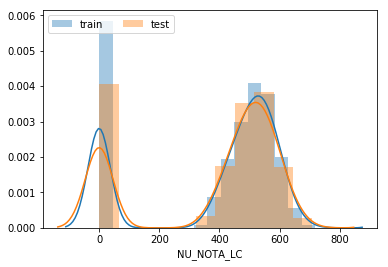

In [29]:
# Geração de gráfico para verificar a quantidade de valores nulos na coluna especificada.
c = treino["NU_NOTA_LC"].fillna(0)
d= teste["NU_NOTA_LC"].fillna(0)

sns.distplot(c)
sns.distplot(d)
plt.legend(labels = ["train", "test"], ncol = 2, loc = "upper left")
plt.show()

C:\Users\DSA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DSA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


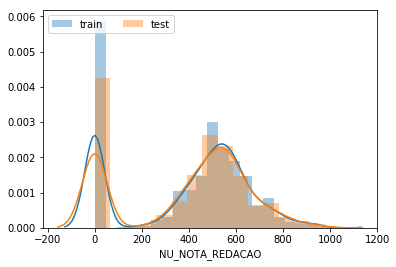

In [30]:
# Geração de gráfico para verificar a quantidade de valores nulos na coluna especificada.
e = treino["NU_NOTA_REDACAO"].fillna(0)
f = teste["NU_NOTA_REDACAO"].fillna(0)

sns.distplot(e)
sns.distplot(f)
plt.legend(labels = ["train", "test"], ncol = 2, loc = "upper left")
plt.show()

C:\Users\DSA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DSA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


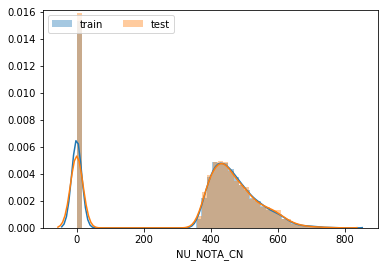

In [31]:
# Geração de gráfico para verificar a quantidade de valores nulos na coluna especificada.
o = treino["NU_NOTA_CN"].fillna(0)
m = teste["NU_NOTA_CN"].fillna(0)

sns.distplot(o)
sns.distplot(m)
plt.legend(labels = ["train", "test"], ncol = 2, loc = "upper left")
plt.show()

In [32]:
# Verificação da quantidade de zeros por coluna
treino[treino["NU_NOTA_CN"]== 0].count()

NU_INSCRICAO       7
NU_NOTA_MT         6
NU_NOTA_CN         7
NU_NOTA_CH         7
NU_NOTA_LC         6
NU_NOTA_REDACAO    6
NU_NOTA_COMP3      6
NU_NOTA_COMP5      6
NU_NOTA_COMP4      6
NU_NOTA_COMP2      6
NU_NOTA_COMP1      6
TP_COR_RACA        7
TP_ESCOLA          7
TP_ST_CONCLUSAO    7
TP_ANO_CONCLUIU    7
IN_BAIXA_VISAO     7
IN_CEGUEIRA        7
IN_SURDEZ          7
dtype: int64

In [33]:
# Verificação da quantidade de zeros por coluna
teste[teste["NU_NOTA_CN"]== 0].count()

NU_INSCRICAO       2
NU_NOTA_CN         2
NU_NOTA_CH         2
NU_NOTA_LC         1
NU_NOTA_REDACAO    1
NU_NOTA_COMP3      1
NU_NOTA_COMP5      1
NU_NOTA_COMP4      1
NU_NOTA_COMP2      1
NU_NOTA_COMP1      1
TP_COR_RACA        2
TP_ESCOLA          2
TP_ST_CONCLUSAO    2
TP_ANO_CONCLUIU    2
IN_BAIXA_VISAO     2
IN_CEGUEIRA        2
IN_SURDEZ          2
dtype: int64

In [34]:
# Podemos perceber que a quantidade dos valores faltantes são praticamente iguais a todas as 
# variaveis. No dataset de treino cada variável tem cerca de 25% de valores missing e no dataset
# de teste 26%. A taxa de abstenção do ENEM de 2016 foi de 30%. Portanto estou partindo do pressuposto
# que os valores faltantes aqui foram faltas dos alunos.

# Por este motivo vou dropar todas as linhas que possuam valores missing e rodar o modelo para ver o
# resultado.

In [35]:
train1 = treino.dropna()

In [36]:
train1.shape

(10097, 18)

In [37]:
test1 = teste.dropna()
test1.shape

(3360, 17)

In [38]:
train1.isnull().sum()

NU_INSCRICAO       0
NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP3      0
NU_NOTA_COMP5      0
NU_NOTA_COMP4      0
NU_NOTA_COMP2      0
NU_NOTA_COMP1      0
TP_COR_RACA        0
TP_ESCOLA          0
TP_ST_CONCLUSAO    0
TP_ANO_CONCLUIU    0
IN_BAIXA_VISAO     0
IN_CEGUEIRA        0
IN_SURDEZ          0
dtype: int64

In [39]:
test1.isnull().sum()

NU_INSCRICAO       0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP3      0
NU_NOTA_COMP5      0
NU_NOTA_COMP4      0
NU_NOTA_COMP2      0
NU_NOTA_COMP1      0
TP_COR_RACA        0
TP_ESCOLA          0
TP_ST_CONCLUSAO    0
TP_ANO_CONCLUIU    0
IN_BAIXA_VISAO     0
IN_CEGUEIRA        0
IN_SURDEZ          0
dtype: int64

In [40]:
#sns.pairplot(train1)

In [41]:
#sns.pairplot(test1)

In [42]:
# Separando features preditoras e target
x_train = train1.drop(['NU_INSCRICAO','NU_NOTA_MT'], axis=1)
y_train = train1['NU_NOTA_MT']

# Padronizando os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [43]:
from sklearn.model_selection import RandomizedSearchCV

#### CRIAÇÃO DE GRADE ALEATORIA PARA HIPERPARAMETRO

In [44]:
# Numero de arvores no RF
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# NUMPY LINSPACE CRIA SEQUÊNCIAS DE VALORES UNIFORMEMENTE ESPAÇADOS DENTRO DE UM INTERVALO

# Numero de recursos a serem considerados em cada divisao
max_features = ["auto", "sqrt"]

# Numero máximo de niveis na arvore
max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Numero minimo de amostras necessarias para divisão de nó da folha
min_samples_split = [2, 5, 10]

# Numero minimo de amostras necessarias em cada nó da folha
min_samples_leaf = [1, 2, 4]

# Método de seleção de amostras para o treinamento de cada árvore de inicialização
bootstrap = [True, False]

In [46]:
# Criação do grid
random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
               "min_samples_split" : min_samples_split,
               "min_samples_leaf" : min_samples_leaf,
               "bootstrap" : bootstrap}


In [47]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [49]:
rf = RandomForestRegressor()

In [50]:
# Agora usamos o random_grid para buscar os melhores hiperparametros
# Pesquisa parametros usando validação cruzada de 3 vezes
# Pesquisar 100 combinaçoes diferentes
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 100, cv = 3, verbose = 2, n_jobs = -1)

In [51]:
# Fit da pesquisa aleatoria
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 74.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [53]:
rfr = RandomForestRegressor(n_estimators = 800, min_samples_split = 5,
                           min_samples_leaf = 2, max_features = "sqrt", max_depth = 10,
                           bootstrap = True)

In [54]:
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
y_predict_train = rfr.predict(x_train)

In [56]:
print('MAE:', metrics.mean_absolute_error(y_train, y_predict_train))
print("MSE", metrics.mean_squared_error(y_train, y_predict_train))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_train, y_predict_train)))

MAE: 51.46989714495141
MSE 4134.326813361419
RMSE 64.29873104005567


In [57]:
x_test = test1.drop(["NU_INSCRICAO"], axis = 1)
x_test = scaler.fit_transform(x_test)

In [58]:
y_test_pred = rfr.predict(x_test)

In [ ]:
#y_test_pred 

In [59]:
output = pd.DataFrame({"NU_INSCRICAO": test1.NU_INSCRICAO,
                      "NU_NOTA_MT": np.round(y_test_pred,2)})

In [60]:
output.to_csv("answer.csv", index = False)